In [1]:
"""
Purpose: To practice splitting a limb from a multi soma
and then maybe export them into different neurons


"""

'\nPurpose: To practice splitting a limb from a multi soma\nand then maybe export them into different neurons\n\n\n'

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")

In [3]:
from importlib import reload

import neuron_utils as nru

import neuron

import neuron_visualizations as nviz

import time

import datajoint_utils as du

import numpy as np

INFO - 2020-12-24 23:50:31,890 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2020-12-24 23:50:31,891 - settings - Setting database.user to celiib
INFO - 2020-12-24 23:50:31,892 - settings - Setting database.password to newceliipass
INFO - 2020-12-24 23:50:31,933 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2020-12-24 23:50:31,934 - settings - Setting enable_python_native_blobs to True
INFO - 2020-12-24 23:50:31,949 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2020-12-24 23:50:32,176 - settings - Setting enable_python_native_blobs to True


In [4]:
minnie,schema = du.configure_minnie_vm()

INFO - 2020-12-24 23:50:33,939 - settings - Setting enable_python_native_blobs to True
INFO - 2020-12-24 23:50:34,168 - settings - Setting enable_python_native_blobs to True


# Getting the Neuron to Split

In [5]:
segment_id = 864691134884782074 

In [6]:
neuron_obj = (minnie.Decomposition & dict(segment_id=segment_id)).fetch1("decomposition")

Decompressing Neuron in minimal output mode...please wait


In [7]:
nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(),
                     mesh_whole_neuron=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [8]:
nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Preview of How th Neuron Will Need to be Split

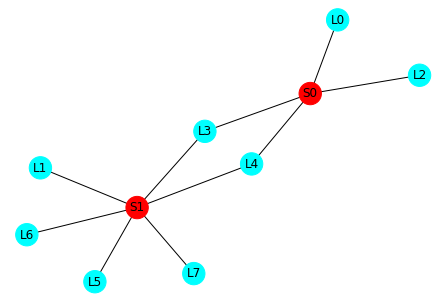

In [9]:
nviz.plot_soma_limb_concept_network(neuron_obj)

In [10]:
multi_soma_limbs = nru.multi_soma_touching_limbs(neuron_obj)
multi_soma_limbs
multi_touch_limbs = nru.same_soma_multi_touching_limbs(neuron_obj)
multi_touch_limbs
total_limbs_to_process = np.unique(np.concatenate([multi_soma_limbs,multi_touch_limbs]))
total_limbs_to_process

array([3, 4])

# Function that will determine the splitting

In [15]:
import proofreading_utils as pru
import error_detection as ed

multi_soma_limbs = [3 4]
multi_touch_limbs = [4]


 -------- Working on limb 3------------
Starting combinations to process = [(2, 4)]


---- working on disconnecting 2 and 4
---- This disconnects S0_0 from S1_0  
 Cut iteration 0
Shortest path = [2 1 7 4]
Found 1 high degree coordinates to cut
Picking [989865. 967476. 717657.] high degree coordinates to cut
coordinate_branches = [1 3 7 9]
Angle between 1 and 3 = 35.98 
Angle between 1 and 7 = 131.43 
Angle between 1 and 9 = 50.16 
Angle between 3 and 7 = 79.78 
Angle between 3 and 9 = 100.79 
Angle between 7 and 9 = 5.65 
Final Matches = [[1, 3], [7, 9]]
Original graph


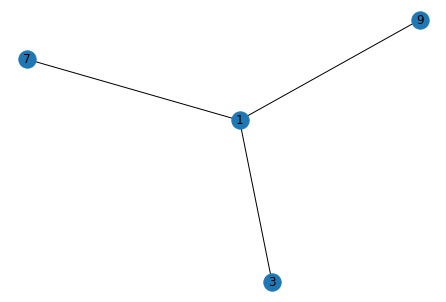

edges_to_delete = [array([1, 7]), array([1, 9])]
edges_to_create = [array([7, 9])]
edges_to_delete = [array([1, 7]), array([1, 9])]
edges_to_create = [array([7, 9])]
 Cut iteration 1
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2


 -------- Working on limb 4------------
Starting combinations to process = [(2, 24), (2, 0), (24, 0)]


---- working on disconnecting 2 and 24
---- This disconnects S0_0 from S0_1  
 Cut iteration 0
Shortest path = [ 2  7 22 24]
Found 1 high degree coordinates to cut
Picking [998435.  976382.  751655.5] high degree coordinates to cut
coordinate_branches = [2 3 4 7]
Angle between 2 and 3 = 84.58 
Angle between 2 and 4 = 23.24 
Angle between 2 and 7 = 127.2 
Angle between 3 and 4 = 75.29 
Angle between 3 and 7 = 34.7 
Angle between 4 and 7 = 70.5 
Final Matches = [[2, 4], [3, 7]]
Original graph


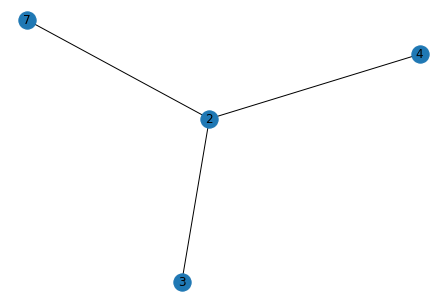

edges_to_delete = [array([2, 3]), array([2, 7])]
edges_to_create = [array([3, 7])]
edges_to_delete = [array([2, 3]), array([2, 7])]
edges_to_create = [array([3, 7])]
 Cut iteration 1
No valid path so moving onto the next connection


---- working on disconnecting 2 and 0
---- This disconnects S0_0 from S1_0  
 Cut iteration 0
No valid path so moving onto the next connection


---- working on disconnecting 24 and 0
---- This disconnects S0_1 from S1_0  
 Cut iteration 0
Shortest path = [24 22  7  0]
Found 1 high degree coordinates to cut
Picking [998435.  976382.  751655.5] high degree coordinates to cut
coordinate_branches = [2 3 4 7]
Angle between 2 and 3 = 84.58 
Angle between 2 and 4 = 23.24 
Angle between 2 and 7 = 127.2 
Angle between 3 and 4 = 75.29 
Angle between 3 and 7 = 34.7 
Angle between 4 and 7 = 70.5 
Final Matches = [[2, 4], [3, 7]]
Original graph


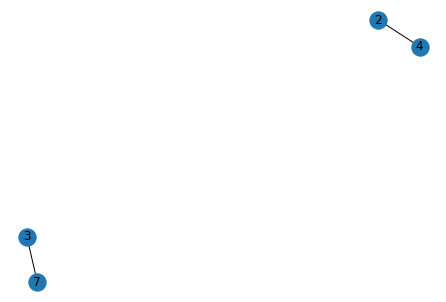

edges_to_delete = []
edges_to_create = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [24 22]
  Edge: [22  7]
  Edge: [7 0]

Total time for doubling_back = 0.06654214859008789
There were 1 edges that passed doubling back threshold of 130
Winning edge [22  7] had a doubling back of 1
edges_to_delete = [array([22,  7])]
 Cut iteration 1
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3


In [13]:
limb_results = pru.multi_soma_split_suggestions(neuron_obj)

In [14]:
limb_results

{3: [{'starting_node_1': 2,
   'starting_node_2': 4,
   'title': 'S0_0 from S1_0 ',
   'edges_to_cut': [array([1, 7]), array([1, 9])],
   'coordinate_suggestions': [array([989865., 967476., 717657.]),
    array([989865., 967476., 717657.])],
   'successful_disconnection': True}],
 4: [{'starting_node_1': 2,
   'starting_node_2': 24,
   'title': 'S0_0 from S0_1 ',
   'edges_to_cut': [array([2, 3]), array([2, 7])],
   'coordinate_suggestions': [array([998435. , 976382. , 751655.5]),
    array([998435. , 976382. , 751655.5])],
   'successful_disconnection': True},
  {'starting_node_1': 2,
   'starting_node_2': 0,
   'title': 'S0_0 from S1_0 ',
   'edges_to_cut': [],
   'coordinate_suggestions': [],
   'successful_disconnection': True},
  {'starting_node_1': 24,
   'starting_node_2': 0,
   'title': 'S0_1 from S1_0 ',
   'edges_to_cut': [array([22,  7])],
   'coordinate_suggestions': [array([992144., 979056., 747836.])],
   'successful_disconnection': True}]}

In [ ]:
revised_neuron = ed.split_neuron_limb(neuron_obj,
                     seperated_graphs,
                     curr_limb_idx,
                     verbose = False)